# Generate and fit random galaxy power spectrum (observed coordinates)

Instead of using comoving wavenumbers ($k_\perp$,$k_\parallel$), in 1/Mpc, we use dimensionless
wavenumbers, corresponding to radians and dv/c = log(1+z):

$q_\perp = k_\perp D_A(z) (1+z) \hspace{20pt} q_\parallel = k_\parallel D_H(z) (1+z) \hspace{10pt}$

with $\hspace{10pt} D_H(z) = \frac{c}{H(z)}$.

In [1]:
%matplotlib inline
import numpy as np
import os
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from sigmaX import cosmology
from sigmaX import galaxy_power
from sigmaX import galaxy_survey

### Setup cosmology dictionaries, with everything we might want to use later on

In [2]:
cosmo_true=cosmology.get_cosmo(z=0.02,b=2.0)
cosmology.print_cosmo_info(cosmo_true)

f = 0.5456054001560122
sig8 = [0.79439401]
sig12 = [0.79167321]
DA = 87.31755529174495
DH = 4431.799203422664


### Generate random realisation (in observed coordinates)

Uncertainties are given by:

$\frac{ \sigma_P }{P} = 2 \pi \sqrt {\frac{2}{V k^2 dk dmu} } \frac{1+n P}{n P} = 2 \pi \sqrt{ \frac{2}{V k_t dk_t dk_p} } \frac{1+n P}{n P}$

Text(0, 0.5, '$P_g(q)$')

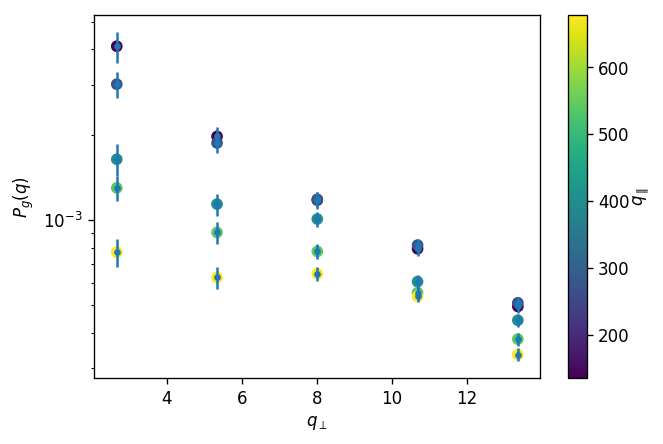

In [3]:
survey=galaxy_survey.get_survey(cosmo_true)
qt=survey['qt']
qp=survey['qp']
galP_real,galP_err=galaxy_survey.get_galP_rand(survey,cosmo_true)
plt.yscale('log')
plt.errorbar(qt,galP_real,yerr=galP_err,fmt=".")
plt.scatter(qt,galP_real,c=qp)
cbar=plt.colorbar()
cbar.set_label(r'$q_\parallel$', labelpad=+1)
plt.xlabel(r'$q_\perp$')
plt.ylabel(r'$P_g(q)$')

### Make predictions with the wrong cosmology

In [4]:
# we will use the wrong reference cosmology (different h and Omega_m)
cosmo_ref=cosmology.get_cosmo(cosmo_true['z'],H0=50)

In [5]:
cosmology.print_cosmo_info(cosmo_ref)

f = 0.7447070068827061
sig8 = [0.72851928]
sig12 = [0.89586132]
DA = 116.56741497240378
DH = 5894.224842564569


In [6]:
cosmology.print_cosmo_info(cosmo_true)

f = 0.5456054001560122
sig8 = [0.79439401]
sig12 = [0.79167321]
DA = 87.31755529174495
DH = 4431.799203422664
